## Building model
### Libraries

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
#import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


### Loading datasets

In [2]:
actions = np.array(['adios', 'amor', 'animal',
                    'bienvenida', 'gracias', 'hola', 
                    'hombre', 'internet', 'mujer',
                    'nino_na', 'objeto', 'persona',
                    'radio', 'television', 'tristeza'])

In [3]:
data_folder='dataset/size_0_3'

X_train=np.load(os.path.join(data_folder, 'X_train.npy'))
X_val=np.load(os.path.join(data_folder, 'X_test.npy'))
y_train=np.load(os.path.join(data_folder, 'y_train.npy'))
y_val=np.load(os.path.join(data_folder, 'y_test.npy'))

### Build and Train LSTM Neural Network

In [4]:
log_dir=os.path.join('Logs/log_pt10_noes')
tb_callback=TensorBoard(log_dir=log_dir)

In [4]:
# Build the LSTM model
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [5]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 597071 (2.28 MB)
Trainable params: 597071 

In [6]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [7]:
# Define early stopping
early_stopping=EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)


In [8]:
# Train the model
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1200, callbacks=[early_stopping])

Epoch 1/1200
10/10 [==============================] - 6s 185ms/step - loss: 3.3316 - categorical_accuracy: 0.0667 - val_loss: 2.7346 - val_categorical_accuracy: 0.0444
Epoch 2/1200
10/10 [==============================] - 1s 117ms/step - loss: 2.8181 - categorical_accuracy: 0.0825 - val_loss: 3.3295 - val_categorical_accuracy: 0.1556
Epoch 3/1200
10/10 [==============================] - 1s 123ms/step - loss: 2.9175 - categorical_accuracy: 0.1048 - val_loss: 2.5972 - val_categorical_accuracy: 0.0815
Epoch 4/1200
10/10 [==============================] - 1s 123ms/step - loss: 2.5097 - categorical_accuracy: 0.1619 - val_loss: 2.4412 - val_categorical_accuracy: 0.1852
Epoch 5/1200
10/10 [==============================] - 1s 121ms/step - loss: 2.2571 - categorical_accuracy: 0.2159 - val_loss: 2.5314 - val_categorical_accuracy: 0.2593
Epoch 6/1200
10/10 [==============================] - 1s 126ms/step - loss: 2.0575 - categorical_accuracy: 0.2762 - val_loss: 2.0337 - val_categorical_accuracy:

In [9]:
%load_ext tensorboard
%tensorboard --logdir=./Logs

Reusing TensorBoard on port 6006 (pid 21412), started 8:04:15 ago. (Use '!kill 21412' to kill it.)

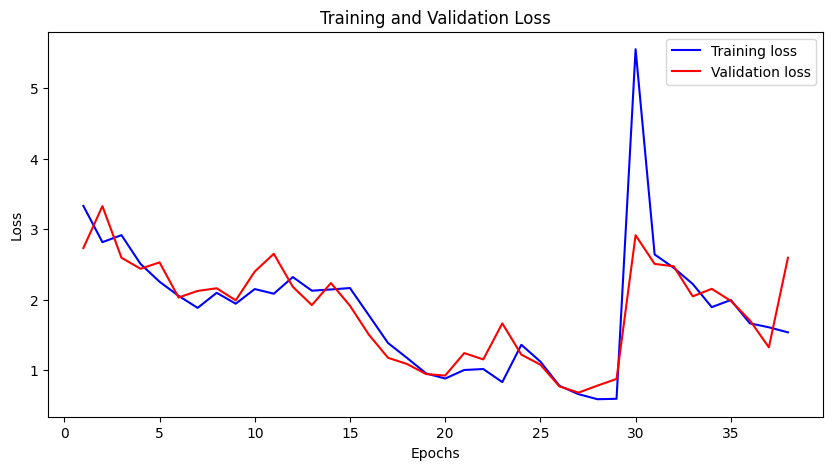

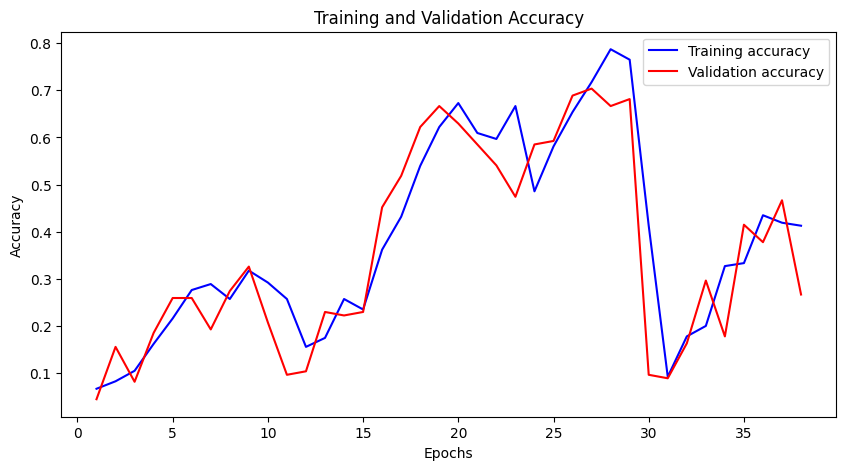

In [9]:
# Obtener las métricas de pérdida y precisión
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy=history.history['categorical_accuracy']
val_accuracy=history.history['val_categorical_accuracy']
epochs = range(1, len(train_loss) + 1)

# Gráfica de pérdida
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de precisión
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make Predictions

In [10]:
res=model.predict(X_val)

5/5 [==============================] - 1s 42ms/step


In [11]:
actions[np.argmax(res[0])]

'animal'

In [12]:
actions[np.argmax(y_val[0])]

'animal'

## Save Weights
### Saving model

In [53]:
# Check if the directory 'models' already exists
if not os.path.exists("models"):
    os.makedirs("models")

In [54]:
# Saving the model
model.save("models/sl_model_ver1.h5")

### Loading model

In [15]:
# Path to the model file
model_path="models/sl_model_ver1.h5"

In [16]:
# Load the model
model=load_model(model_path)

In [17]:
# Check the structure model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 597071 (2.28 MB)
Trainable params: 597071 

In [18]:
model.load_weights(model_path)

### Evaluation using Confusion Matrix and Accuracy

In [13]:
ypred=model.predict(X_val)

5/5 [==============================] - 0s 42ms/step


In [14]:
ytrue=np.argmax(y_val, axis=1)
ypred=np.argmax(ypred, axis=1)

In [15]:
# Calcular la matriz de confusión multilabel
confusion_matrix=multilabel_confusion_matrix(ytrue, ypred)
confusion_matrix

array([[[127,   1],
        [  6,   1]],

       [[120,   1],
        [  0,  14]],

       [[116,   7],
        [  3,   9]],

       [[122,   7],
        [  0,   6]],

       [[129,   0],
        [  0,   6]],

       [[126,   0],
        [  1,   8]],

       [[119,   4],
        [  0,  12]],

       [[115,   9],
        [  0,  11]],

       [[125,   0],
        [  6,   4]],

       [[123,   2],
        [  3,   7]],

       [[131,   0],
        [  0,   4]],

       [[119,   6],
        [  7,   3]],

       [[125,   5],
        [  5,   0]],

       [[125,   2],
        [  8,   0]],

       [[123,   1],
        [  6,   5]]], dtype=int64)

In [16]:
len(confusion_matrix)

15

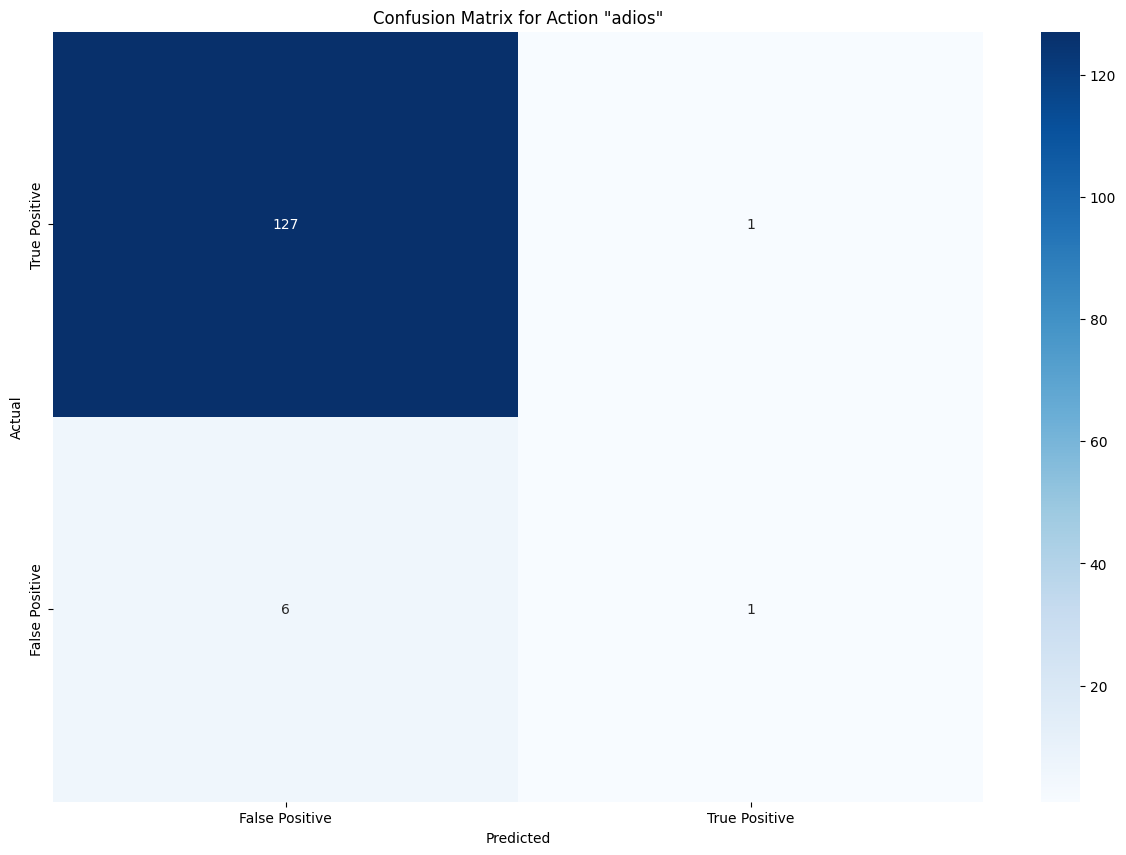

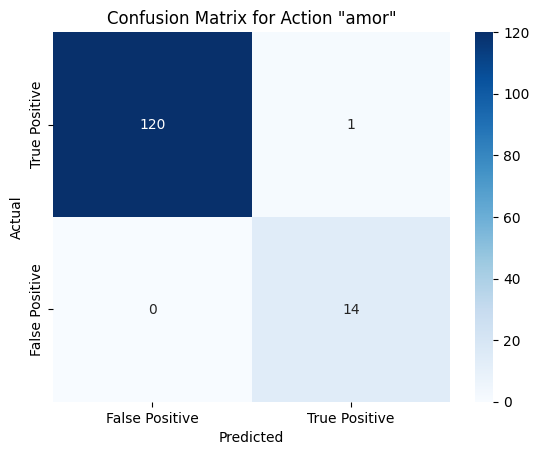

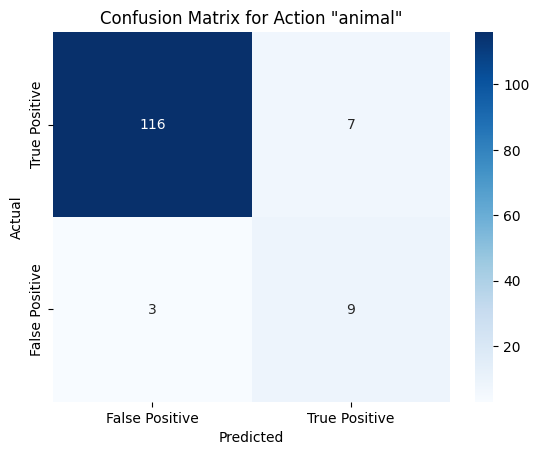

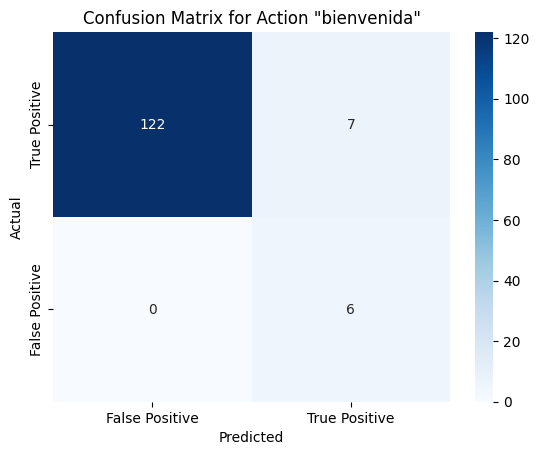

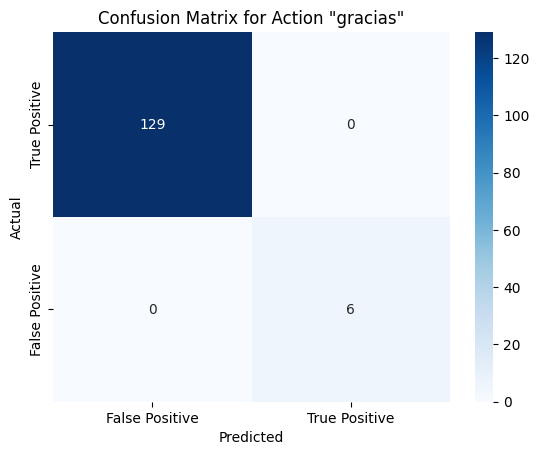

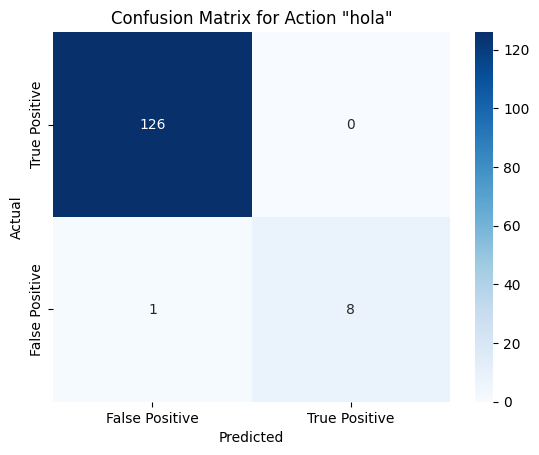

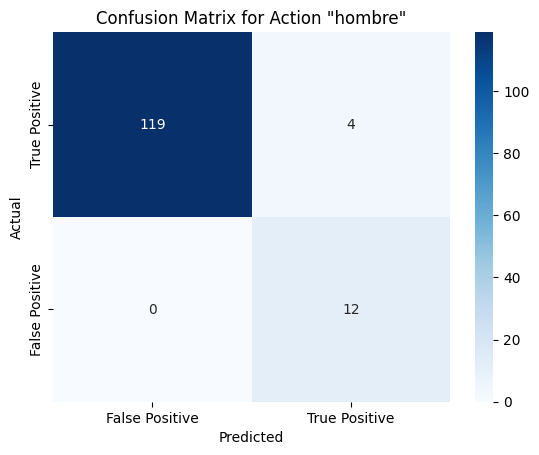

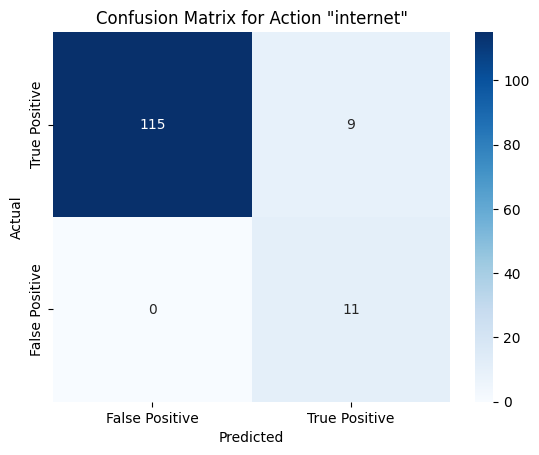

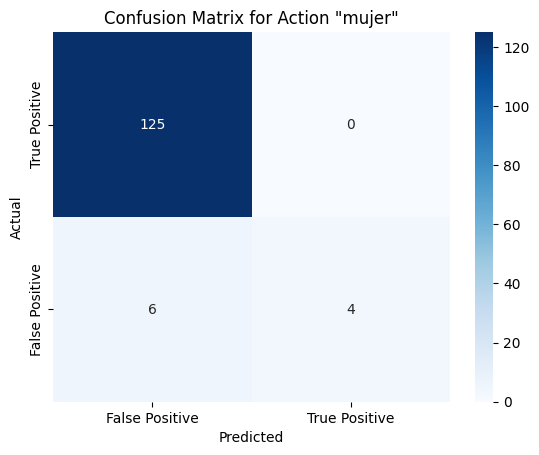

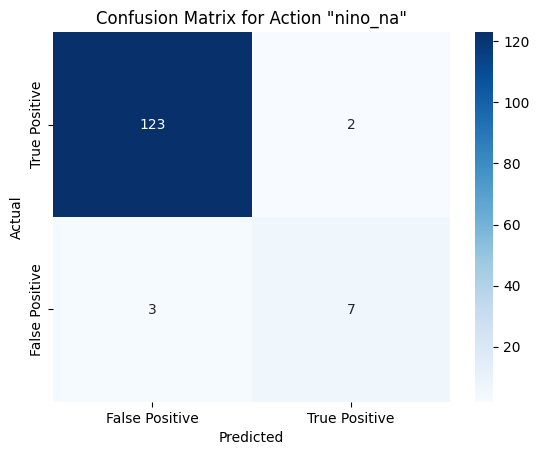

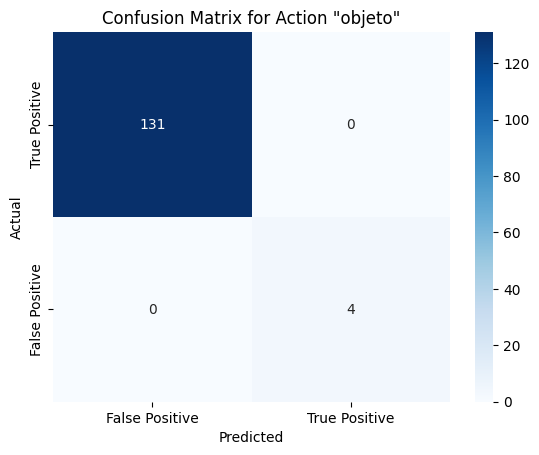

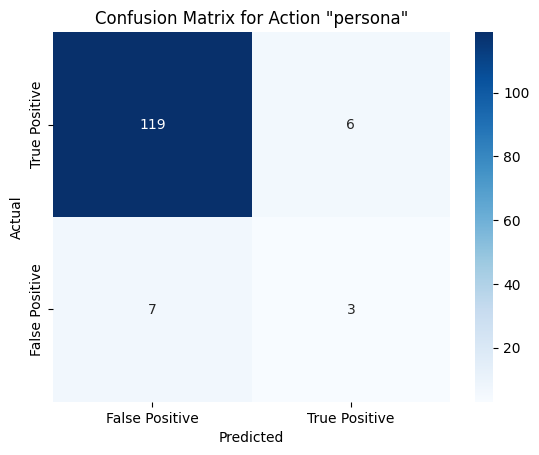

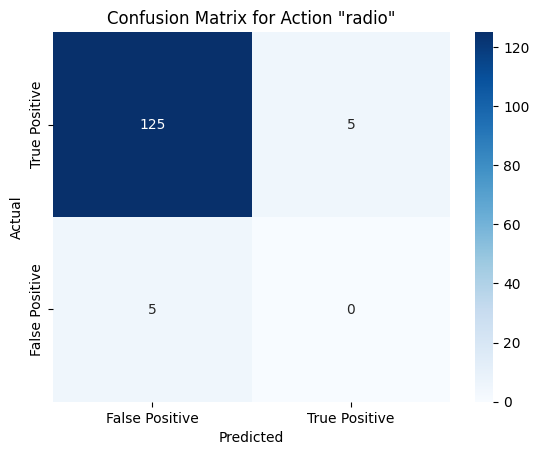

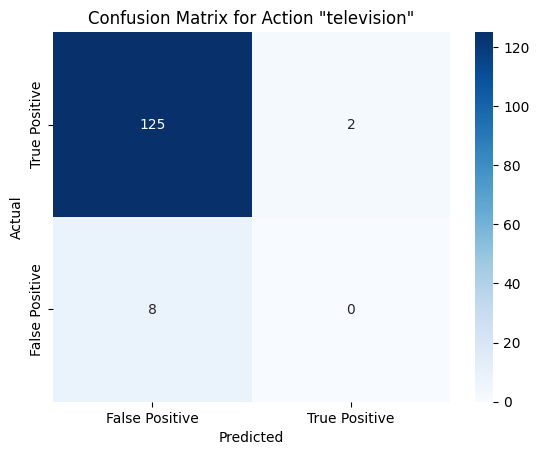

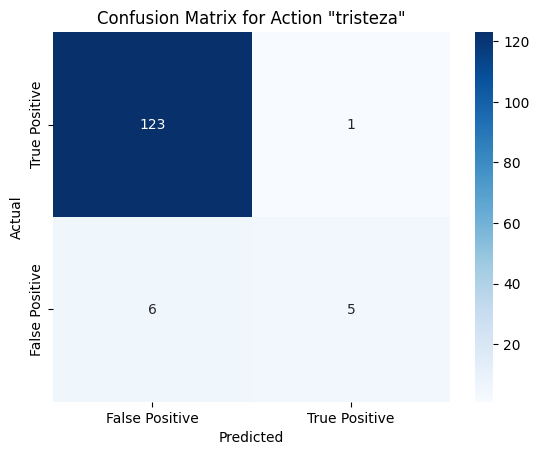

In [17]:
# Visualización usando Seaborn
plt.figure(figsize=(15, 10))
for i in range(len(confusion_matrix)):
    # Verificar si hay alguna predicción para esta acción
    if np.any(np.array([ytrue == i, ypred == i]).T):
        sns.heatmap(confusion_matrix[i], annot=True, fmt='.0f', cmap='Blues', 
                    xticklabels=['False Positive', 'True Positive'],
                    yticklabels=['True Positive', 'False Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Action "{actions[i]}"')
        plt.show()

In [18]:
ytrue = np.argmax(y_val, axis=1).tolist()
ypred = model.predict(X_val)
ypred = np.argmax(ypred, axis=1).tolist()
accuracy_score(ytrue, ypred)

5/5 [==============================] - 0s 43ms/step


0.6666666666666666